## Objective 01 - Describe the Foundational Components of a Neural Network
### Overview
Later in this module, we will use a few handy tools to architect and train neural networks. But before we dive into that, we need to understand much more basic concepts of neural networks. As you can see from the name, neural networks use neurons, a digital-analog of a biological neuron. These neurons are linked or networked in a certain way to form a neural network. Essentially, a neural network is a computational model that works similarly to the human (or animal) brain.

Neural networks range from simple single-layer perceptrons to complex ones with many hidden layers composed of many neurons. The complexity of the neural network depends on the dataset and the problem to solve.

#### Perceptron
A neuron can be a single unit that accepts input (data) and provides output. The value of the output depends on the activation threshold of the neuron. The neuron will "fire" if the input is above the threshold; otherwise, the output is zero.

The input to this perceptron is the data multiplied by a set of weights. The weights are updated for each iteration or pass through the network. The weighted input is then passed to the activation function. This function maps the input to the output, which depends on the function.

We start with some input data and a set of weights to apply to that data. The one part we haven't mentioned yet is how a neural network learns. On the first iteration, the weights are selected randomly. Then, the weights are adjusted after the calculated results are compared to the expected results (using training data). Finally, these new weights are used to calculate the weighted sum, new results are calculated, and so on for the number of iterations specified.

### Follow Along
Let's implement a simple single-layer perceptron to explain better what we learned in the overview. It will be easier to understand how the different components of a neural network fit together with some example code.

In the following example, we'll describe and implement the following parts of a neural network:

- activation function
- input data
- weights
- learning rate
#### Activation function
The activation function maps the input to the output. This example uses a step function where the output is 0 if the sum of the weighted input is less than 0 and 1 otherwise. Again, a visualization of the function will help.

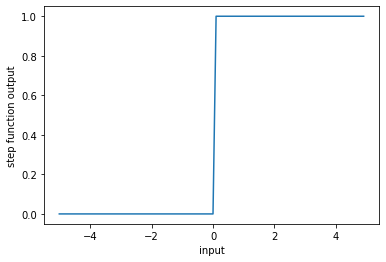

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Activation Function
unit_step = lambda x: 0 if x < 0 else 1

# Vectorize the function (use on an array)
unit_step_v = np.vectorize(unit_step)

# Create arrays to plot
x = np.arange(-5, 5, 0.1)
y = unit_step_v(x)

# Plot
plt.plot(x, y)
plt.xlabel('input'); plt.ylabel('step function output');

# plt.clf() # comment/delete to show plot

In [3]:
import platform


In [4]:
platform.python_version()

'3.8.10'

Next, we'll define some data to test, which in this case will be the logical OR operator: for input that includes a 1, the output is 1; otherwise, the output is 0. We'll consider an input array of two values so the possible choices are: [0,0], [0,1], [1,0], [1,1]. There is also a bias term, which is currently set to 1 for all inputs (we can use the bias to adjust the threshold; we will focus on the weights only first). The other part of the training data is the expected output, 0 for [0,0] and 1 for the rest of the inputs.

In [5]:
# Data ('OR' gate)
# tuple format: ([x1, x2, bias], expected)
training_data = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 1),
    (np.array([1,0,1]), 1),
    (np.array([1,1,1]), 1),
]

Now we'll code the perceptron. First, we'll initialize the weights using random numbers between 0 and 1. Then we'll set the learning rate as 0.2 (we'll learn more about the learning rate in the next module). We'll start with a low number of iterations so we can easily look through our output.

In [11]:
# Perceptron code follows the example here, with
# some modifications: 
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/

# Imports
#for random input selection
from random import choice 

# Weights (begin with random weights)
w = np.random.rand(3)

# Errors (store for plotting)
errors = []

# Learning rate (the size of "jumps" when updating the weights)
learn_rate = 0.2

# Number of iterations/weight updates
n = 50

# "Learning" loop
for i in range(n):

    # Select a random item from the training data
    x, expected = choice(training_data)

    # Neuron calculation (dot product of weights and input)
    result = np.dot(w, x)

    # Compare to the expected result
    error = expected - unit_step(result)
    errors.append(error)

    # Update the weights
    w += learn_rate * error * x

# Test the perceptron with the "learned" weights
for x, _ in training_data:
    result = np.dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))

[0 0]: -0.13830195751640012 -> 0
[0 1]: 0.17853358036526035 -> 1
[1 0]: 0.1496228775425748 -> 1
[1 1]: 0.46645841542423533 -> 1


We made a neural network! It learned to predict a 0 when the input was [0,0] and 1 otherwise. We completed 50 iterations, which seems like plenty to learn this simple model. We'll plot the error as a function of iteration and see when it stays at zero. .

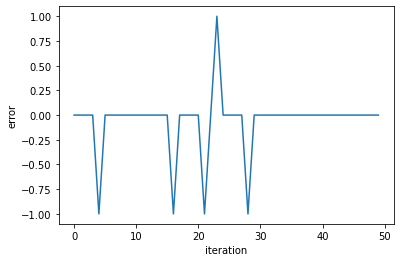

In [12]:
# Imports
import matplotlib.pyplot as plt

# Plot error as a function of iteration
iteration = np.arange(0, n, 1)
plt.plot(iteration, errors)
plt.xlabel('iteration'); plt.ylabel('error');

# plt.clf() # comment/delete to show plot

The error stays at zero after about 20 iterations (though this will change because of the random weights chosen at the start), which seems reasonable for a small dataset and a relatively simple learning model.
## Challenge
There are a few parameters that can be adjusted in the above example. But first, you might want to wrap the perceptron in a function and then try out different parameters. For example, try using a different activation function; the sigmoid (Links to an external site.) is a commonly used one. Another parameter that could be adjusted is the learning rate; what changes do you have if you set this to a larger value, such as 0.75? Finally, try a different training dataset, such as the logical AND operator.

### Additional Resources
3Blue1Brown: But what is a Neural Network? | Deep learning, chapter 1 (Links to an external site.) https://www.youtube.com/watch?v=aircAruvnKk&t=6s
First neural network for beginners explained (with code) (Links to an external site.) https://medium.com/@thomascountz/perceptrons-in-neural-networks-dc41f3e4c1b9
Perceptrons in Neural Networks https://medium.com/@thomascountz/perceptrons-in-neural-networks-dc41f3e4c1b9

## Objective 02 - Introduce the Keras Sequential Model API
### Overview
In the last objective, we coded a single-layer perceptron using just Python and NumPy. While this was (hopefully) a helpful exercise, most of the neural networks you'll be working with are more complicated and include many more layers and neurons.

Fortunately, there is an excellent high-level library called Keras (Links to an external site.) that we can use to build neural networks. The Keras library is user-friendly and modular, with the option to use different back ends, including TensorFlow, CNTK, Theano, MXNet, and PlaidML

#### Keras Classes
This library provides a simple way to create and train neural networks. We'll be using the sequential model class (tf.keras.models.Sequential()) and will add layers with the layer activation functions (model.add(layers.Dense()). After the model is created, we need to compile it with the model training class (Model.compile()).

- Load Data
- Define Model
- Compile Model
- Fit Model
- Evaluate Model

In [13]:
# Imports
import pandas as pd

# Create the OR operator
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [0,1,1,1]
       }

df = pd.DataFrame.from_dict(data).astype('int')
display(df.head())

# Separate feature and target
X = df[['x1', 'x2']].values
y = df['y'].values

,x1,x2,y
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,1


### Keras Perceptron
Now we'll use Keras to create the perceptron model. We have one layer, which is both the input layer and the output layer.

In [19]:
# Import Keras classes
# from tensorflow.keras.models import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Perceptron model
model = Sequential()
model.add(Dense(1,input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,y, epochs=10);

Epoch 1/10
1/1 [==============================] - 0s 244ms/step - loss: 0.6745 - accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.5000


In [20]:
# Evaluate the model
print('Model accuracy: ', model.evaluate(X, y)[1]*100)

1/1 [==============================] - 0s 80ms/step - loss: 0.6675 - accuracy: 0.5000
Model accuracy:  50.0


### Follow Along
We'll test out keras with the Pima Indians diabetes dataset. Recall that this dataset uses various health metrics to predict if a certain individual will have the specified disease, in this case diabetes. The dataset information is available here. (Links to an external site.)

 (Links to an external site.)The link to the csv is in the code cell below.

#### Data Parameters
We have eight input variables (features) that we're using to predict if the presence of the disease has been tested as positive (0-no, 1-yes). As usual, we'll load the data and separate it into training and testing sets.

In [21]:
# Load the Pima Indians diabetes dataset
import numpy as np

# Set the URL for the data location
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

# Load the dataset
dataset = np.loadtxt(url, delimiter=',')

# Split into input (X) and output (y) variables
# (8 input columns, 1 target column)
X = dataset[:,0:8]
y = dataset[:,8]

#### Define the Layers
We have eight inputs to our model, so the input layer should have eight neurons. But, determining the number of other "hidden" layers and their sizes is a more difficult task. There isn't a simple answer and often we need to use trial and error to decide on the number of layers.

For this dataset, we'll start with three layers:

In [ ]:
# Define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

We have our model layers defined, so the next step is to compile the model. This step is slightly different from the standard scikit-learn models from Unit 2; it is the last step in defining the model before training. In this step, we define the loss function or the error during the learning process. We also set the optimizer, which sets the input weights to the model after comparing the prediction and loss function. Finally, we can choose which metric to use in evaluating our model.

For this dataset, a binary cross entropy loss function is suitable. The optimizer uses the Adam algorithm and is computationally efficient. Finally, we'll use the model accuracy as the metric.

In [ ]:
# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Now the model is ready to train and fit! In this step, we need to specify the data to train on, the number of epochs, and the batch size.

We'll train our first model on the dataset we created above, stored in the X and y variables. The number of epochs specifies how many times the model will go through the whole dataset. For now, we'll set this to be 100, but we'll come back to discussing how to set this value automatically.

Finally, the batch size specifies the number of training examples used to estimate the error gradient. We'll come back to this concept, but for now, it's essential to know that the larger the batch size, the longer it takes to train the model.

Time to train the model!

In [ ]:
# Fit the keras model on the dataset
# (remove the verbose=0 argument to see the output)
model.fit(X, y, epochs=100, batch_size=10, verbose=0);

#### Evaluate the Model
The last step is to evaluate the model. Of course, you'll also see the loss and accuracy values displayed if you have the output from the training set to display. But when we use the model.evaluate() method, we will see the model's overall accuracy, not just for each epoch.

In [ ]:
# Evaluate the model
print('Model accuracy: ', model.evaluate(X, y)[1]*100)

### Challenge
If you have followed along with the above code, you can try changing some of the parameters to see how the model's accuracy changes. An excellent place to start would be with the number of epochs and the batch size. If you set the number of epochs too high, the model will take longer to train. Similarly, if you set the batch size small, it will also take longer to train. We'll cover both of these parameters in the following few modules.

### Additional Resources
About keras (Links to an external site.) https://keras.io/about/
keras API reference https://keras.io/api/